# DASC 512 - Categorical Data Visualization
***
The focus of this notebook is **visualization of categorical data**. We'll again be using a mix of matplotlib.pyplot, seaborn, and pandas to do these plots.

So, our first step is to import those packages and numpy just in case we need it. We'll also set a style.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

We'll continue working with the Belarussian used cars data. Let's import it again.

In [2]:
cars = pd.read_csv('cars.csv')

Let's get a sense of what we're looking at by diving into the car colors.

In [3]:
colors = cars['color']
print(colors.head())

0    silver
1      blue
2       red
3      blue
4     black
Name: color, dtype: object


In [4]:
# So we have string data here. How many colors (classes) are there?
colors.nunique()

12

In [5]:
# And what are those colors (classes)?
colors.unique()

array(['silver', 'blue', 'red', 'black', 'grey', 'other', 'brown',
       'white', 'green', 'violet', 'orange', 'yellow'], dtype=object)

In [6]:
# How many cars are each color? (class frequency)
colors.value_counts()

black     7705
silver    6852
blue      5802
white     4212
grey      3751
red       2925
green     2760
other     2688
brown      886
violet     463
yellow     303
orange     184
Name: color, dtype: int64

In [43]:
sum(colors.value_counts()[5:])/len(cars)

0.26495549038436583

In [7]:
# What is the relative frequency of each color (class)?
colors.value_counts() / len(colors)

black     0.199969
silver    0.177831
blue      0.150580
white     0.109315
grey      0.097350
red       0.075913
green     0.071631
other     0.069762
brown     0.022994
violet    0.012016
yellow    0.007864
orange    0.004775
Name: color, dtype: float64

Ok, that gives you some useful functions for exploring categorical data. Let's get to plotting! We'll start with the bar chart.

## Bar Chart

This is almost always the best option for visualizing categorical data on its own.

In [49]:
bins = np.array(colors.value_counts().index)
bins

array(['black', 'silver', 'blue', 'white', 'grey', 'red', 'green',
       'other', 'brown', 'violet', 'yellow', 'orange'], dtype=object)

In [21]:
counts = colors.value_counts().values
counts

array([7705, 6852, 5802, 4212, 3751, 2925, 2760, 2688,  886,  463,  303,
        184], dtype=int64)

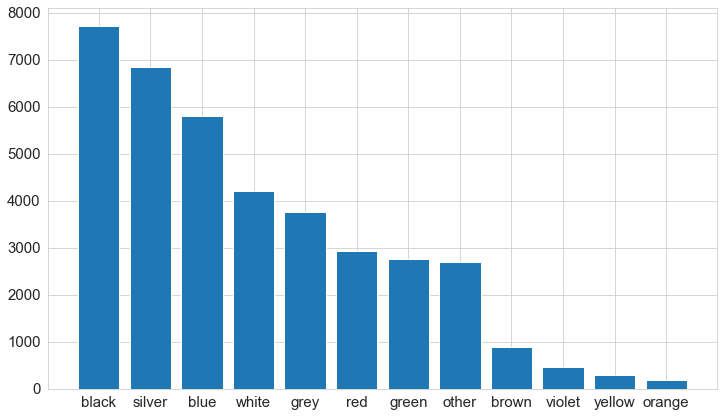

In [30]:
# Using matplotlib.pyplot
plt.rc('font',size=15)  # Changing font size
fig, ax = plt.subplots(figsize=(12,7))
ax.bar(x=bins, height=counts)
plt.show()

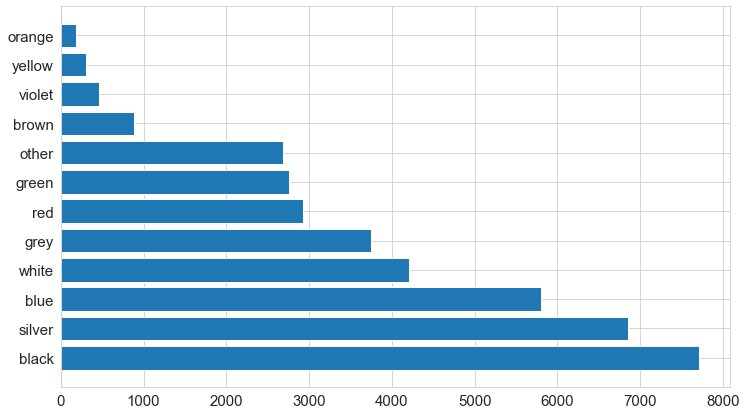

In [35]:
# Alternatively, can do horizontal bars
fig, ax = plt.subplots(figsize=(12,7))
ax.barh(y=bins, width=counts)
plt.show()

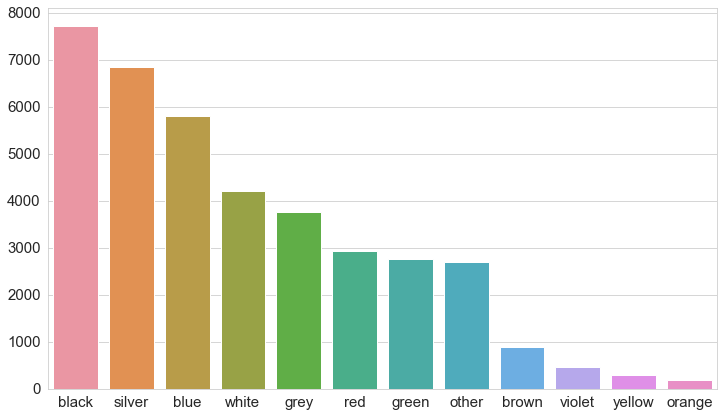

In [66]:
# Using seaborn
fig, ax = plt.subplots(figsize=(12,7))
sns.barplot(x=bins, y=counts)
plt.show()

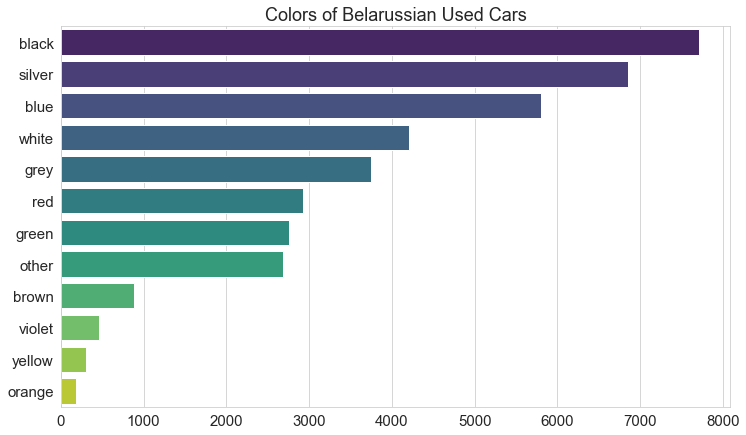

In [40]:
# And now horizontally, using a different color palette
fig, ax = plt.subplots(figsize=(12,7))
sns.barplot(y=bins, x=counts, palette='viridis')
ax.set_title('Colors of Belarussian Used Cars')
plt.show()

In [47]:
# Of course, changing the colors might make this a better graph still
bins

array(['black', 'silver', 'blue', 'white', 'grey', 'red', 'green',
       'other', 'brown', 'violet', 'yellow', 'orange'], dtype=object)

In [51]:
color_labels = bins.copy()
color_labels[7] = 'darkorchid'

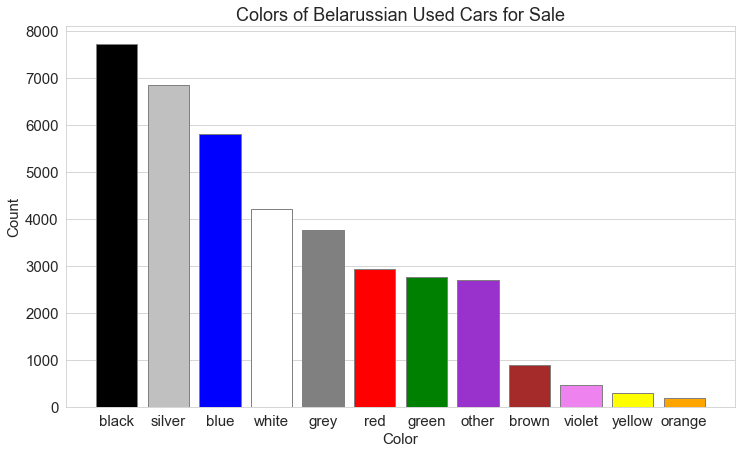

In [69]:
# This kind of customization is easier in matplotlib
fig, ax = plt.subplots(figsize=(12,7))
ax.bar(x=bins, height=counts, color=color_labels, edgecolor='grey')
ax.grid(axis='x')
ax.set_title('Colors of Belarussian Used Cars for Sale')
ax.set_ylabel('Count')
ax.set_xlabel('Color')
plt.show()

## Pie Chart

One of my favorite things about this text book is their disdain for pie charts. Unfortunately, I've had bosses ask for pie charts, and I'm sure you'll be asked to make one at some point.

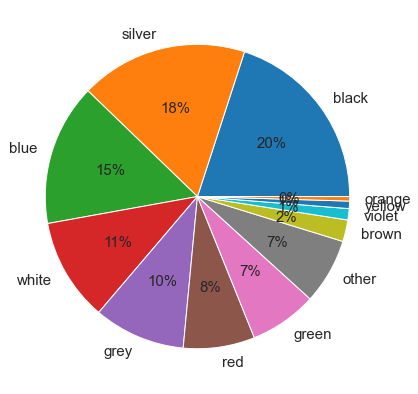

In [60]:
fig = plt.subplots(figsize=(12,7))
plt.pie(x=counts, labels=bins, autopct='%.0f%%')
plt.show()

The autopct argument above is complicated, but this gives percentage. Making it %.1f%% would add one decimal, and so on. This function is clunky and hard to customize. Seaborn doesn't even do pie charts, because pie charts are awful.

Let's show how to do raw counts.

In [38]:
# To customize labels, you have to create a function to convert percentages to what you want.
def calc_numb(perc):
    return round(perc / 100 * len(cars))

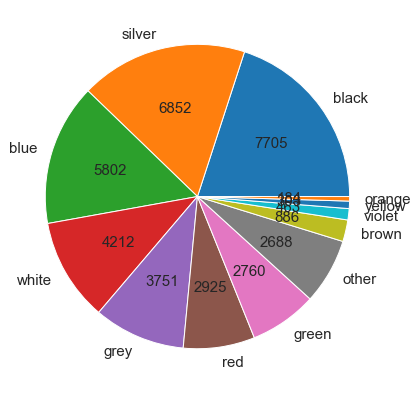

In [39]:
fig = plt.figure(figsize=(12,7))
plt.pie(x=counts, labels=bins, autopct=calc_numb)
plt.show()

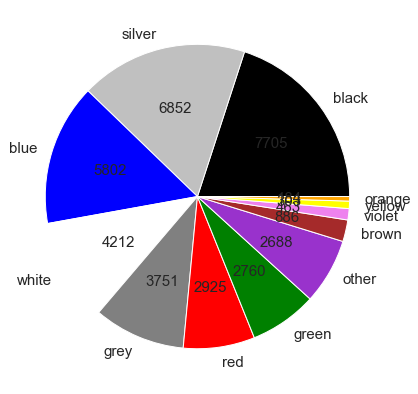

In [64]:
# You could customize the colors again here, but the labels will be hard to read for some colors.
# Consider the pros and cons of various choices!
fig = plt.figure(figsize=(12,7))
plt.pie(x=counts, labels=bins, autopct=calc_numb, colors=color_labels)
plt.show()

I won't ask you to create many pie charts in graded assignments. This is here in case you need to refer back to it one day.

# That's all for today!